# Spotify:
### Visualizing the top 100 songs from 2018
#### Grace Thompson

In [153]:
#copied the first cell from the data_visualization notebook with import statements

#visualization tools
import matplotlib.pyplot as plt #matplotlib is a basic plotting library
import seaborn as sns; sns.set() #seaborn is a library that uses matplotlib to make styled plots
from scipy.stats import pearsonr
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
import pandas as pd
import numpy as np; np.random.seed(0)

%matplotlib inline



# Introduction
Throughout history, "popular music" has evolved to align with the social environment in which it was created. In the 1920's Blues and Jazz were considered most popular, whereas now (2019) R&B and Hip Hop are more commonly listened to. The purpose of this analysis was to look for common audio features in top spotify songs last year. I hoped to create an analysis that distils society's current musical preferences at this point in time. The dataset I chose from Kaggle included the top 100 Spotify songs from 2018. 

# Data
I used a Spotify dataset from Kaggle (link: https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018). The data includes (1) the name of the song (2) artist(s) of the song, and (3) audio features of the song (such as acousticness, tempo, time etc.)
    


In [154]:
df = pd.read_csv('top2018.csv').fillna(0)
df.head()

#df = dataframe of top 2018 songs, 

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [155]:
df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [156]:
df.shape

(100, 16)

In [157]:
#Renaming columns in DataFrame to be more easily readable
names={'name': 'Name',
      'artists': 'Artists',}
df.rename(names, inplace=True, axis=1)

In [158]:
df.drop(columns=['id', 'duration_ms', 'tempo'], inplace=True)
df.head()



,Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature
0,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,4.0
1,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,4.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,4.0
4,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,4.0


## Number of hit songs per artist

In [159]:
df['Artists'].value_counts().head(20) #top 20 artists with the most hit songs in top 100

Post Malone        6
XXXTENTACION       6
Drake              4
Marshmello         3
Ed Sheeran         3
Maroon 5           2
Clean Bandit       2
Selena Gomez       2
Imagine Dragons    2
Ozuna              2
Khalid             2
Ariana Grande      2
Kendrick Lamar     2
Camila Cabello     2
Dua Lipa           2
The Weeknd         2
Calvin Harris      2
Migos              2
Anne-Marie         1
Keala Settle       1
Name: Artists, dtype: int64

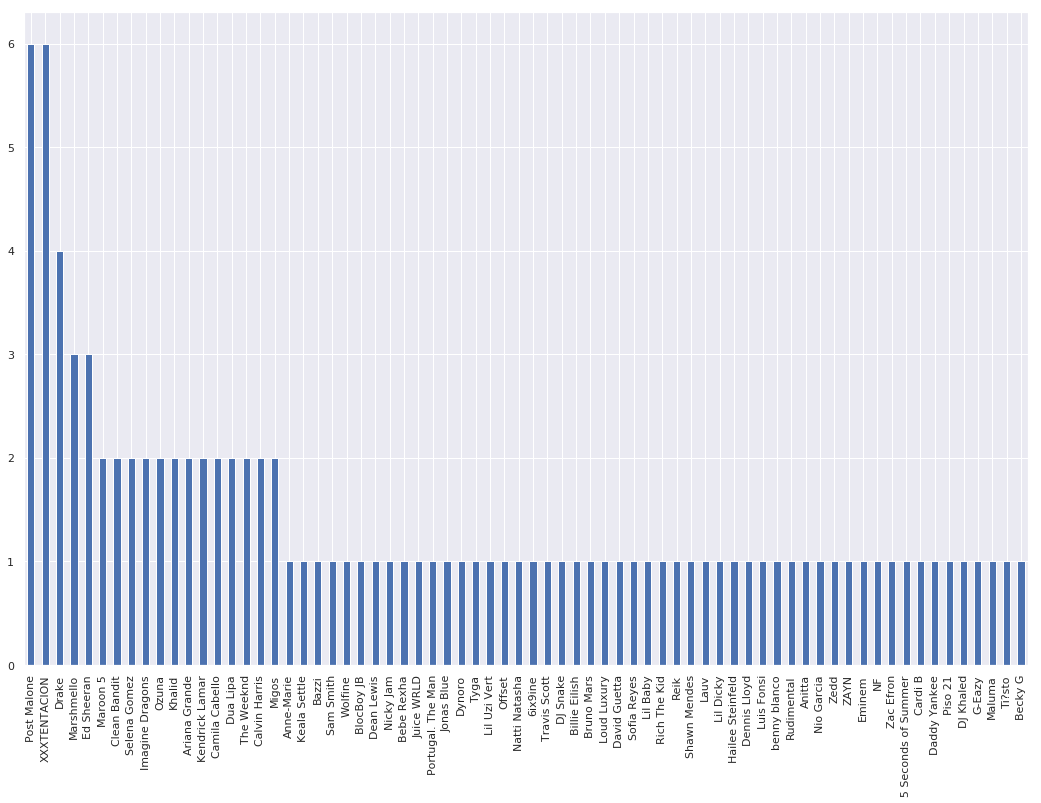

In [160]:
plt.figure(figsize=(18,12))
df['Artists'].value_counts().plot.bar()

Post Malone and XXXTENTACTION each have 6 tracks in the top 100 hits of the year, but it is important to note the amount of hits in the top 100 does not equate to being critically acclaimed- for example Childish Gambino isn't listed (but won 4 grammys for "This is America")

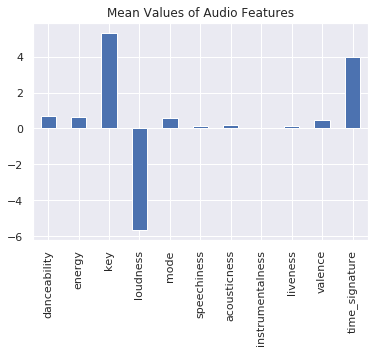

In [161]:
df.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()
# was unable to successfully drop columns for this specific barplot. In future, I would drop key, loudness and time signature for scale consistency

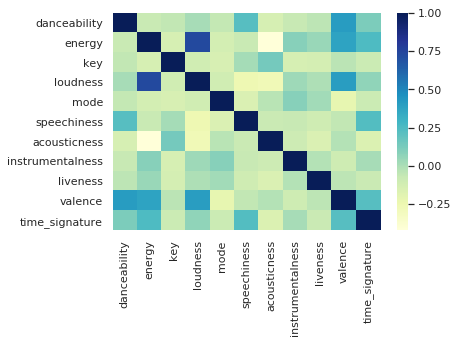

In [162]:
sns.heatmap(df.corr(),cmap="YlGnBu")

There is little correlation between the different song characteristics. That being said, loudness and energy predictably correlate positively, while acousticness and energy have negative correlation. 

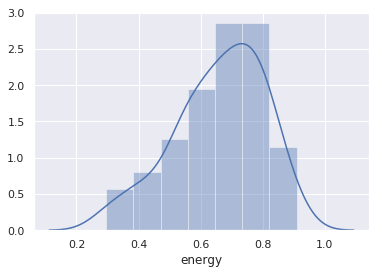

In [163]:
sns.distplot(df['energy'])

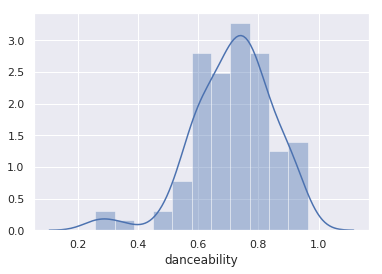

In [164]:
sns.distplot(df['danceability'],hist=True,kde=True)


In [167]:
Correlation=df[['danceability','energy','valence','loudness',]]

In [168]:
# Set conditions
Vd=df['danceability']>=0.75
Ld=(df['danceability']>=0.5) & (df['danceability']<0.75)
Nd=df['danceability']<0.5

In [169]:
data=[Vd.sum(),Ld.sum(),Nd.sum()]
Danceability=pd.DataFrame(data,columns=['percent'],
                   index=['Very','Regular','Instrumental'])

In [170]:
Danceability.head() 

,percent
Very,43
Regular,53
Instrumental,4


Few songs were instrumental in the top 100

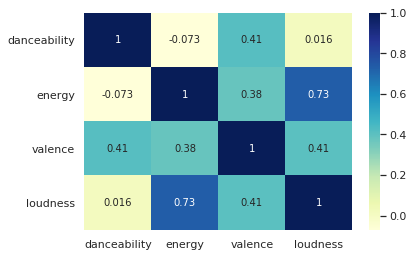

In [171]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlGnBu") #a closer look at specific song feature correlation


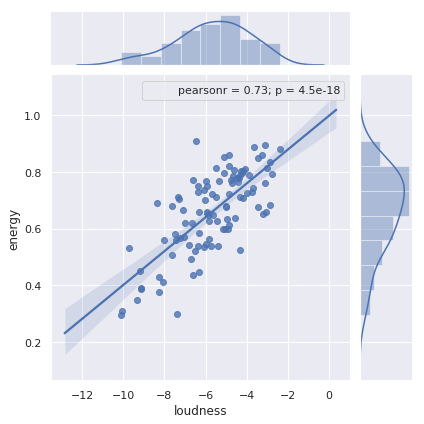

In [172]:
sns.jointplot(data=Correlation,y='energy',x='loudness',kind='reg',stat_func=pearsonr) 

# Contributing
   This project could be furthered by importing a dataset that would allow you to visualize the differences between spotify top 100 songs from previous years. It would be interesteing to visualize how musical preferences have changed over time, and potentially predict how popular music will evolve next. One could also sort songs into genres to see which genre of music is most common in the top 100. An additional small area to fix would be drop certain values so that the Mean Values of Audio Features graph only shows those with values between 0 and 1. 